In [ ]:
# Author : Balaji M
# created on : 20.01.2026

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

train=pd.read_csv("engtamilTrain.csv")
train=train.drop(["Unnamed: 0"],axis=1)
english_sentences=train["en"]
tamil_sentence=train['ta']
english_sentences=english_sentences.head(1000)
tamil_sentences=tamil_sentence.head(1000)

In [2]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [3]:
def sentToken(sentence):
        # define your dataset
    dataset = sentence

    # convert each sentence to a list of words
    sentences = [sentence.split() for sentence in dataset]

    # print the result
    print(sentences)
    
    return sentences


In [4]:
engSentence=sentToken(english_sentences)

[['Just', 'hours', 'before', 'the', 'incident,', 'Kurdish', 'nationalist', 'leader', 'and', 'Iraqi', 'president,', 'Jalal', 'Talibani,', 'had', 'welcomed', 'the', 'US', 'president', 'on', 'his', 'last', 'visit', 'to', 'Iraq', 'as', 'a', 'man', '"who', 'helped', 'us', 'liberate', 'our', 'country', 'and', 'to', 'reach', 'this', 'day', 'in', 'which', 'we', 'have', 'democracy,', 'human', 'rights', 'and', 'prosperity', 'gradually', 'in', 'our', 'country."'], ['Confronting', 'a', 'worsening', 'foreign', 'exchange', 'crisis,', 'the', 'Sri', 'Lankan', 'government', 'is', 'seeking', 'a', '$US1.9', 'billion', 'loan', 'from', 'the', 'International', 'Monetary', 'Fund', '(IMF)', 'to', 'bail', 'out', 'the', 'country.'], ['A', 'room', 'was', 'arranged', 'for', 'him', 'at', 'Sun', 'Towers', 'Lodge.'], ['The', 'kidnapping', 'and', 'threatened', 'execution', 'of', '63-year-old', 'Australian', 'citizen', 'and', 'US', 'resident', 'Douglas', 'Wood', 'is', 'a', 'further', 'expression', 'of', 'the', 'living

In [5]:
tamSentence=sentToken(tamil_sentences)

[['இந்த', 'நிகழ்விற்கு', 'சில', 'மணி', 'நேரம்', 'முன்பு', 'குர்திஷ்', 'தேசியவாத', 'தலைவரும்', 'ஈராக்கிய', 'ஜனாதிபதியுமான', 'ஜலால்', 'டாலிபானி', 'ஈராக்கிற்கு', 'கடைசி', 'முறையாக', 'வரும்', 'அமெரிக்க', 'ஜனாதிபதியை', 'வரவேற்று,', '"நம்', 'நாட்டை', 'நமக்கு', 'விடுவிக்க', 'உதவிய', 'மனிதர்,', 'இன்று', 'நாம்', 'ஜனநாயகம்,', 'மனித', 'உரிமைகள்', 'மற்றும்', 'வளமையை', 'படிப்படியாக', 'நம்', 'நாட்டில்', 'பெறுவதற்கு', 'உதவியவர்"', 'என்று', 'பாராட்டினார்.'], ['மோசமடைந்துவரும்', 'அந்நிய', 'செலாவனி', 'நெருக்கடியை', 'எதிர்கொண்டுள்ள', 'இலங்கை', 'அரசாங்கம்,', 'நாட்டை', 'பிணையெடுப்பதற்காக', 'சர்வதேச', 'நாணய', 'நிதியத்திடம்', 'இருந்து', '1.9', 'பில்லியன்', 'அமெரிக்க', 'டொலர்', 'கடனை', 'எதிர்பார்க்கிறது.'], ['அங்குள்ள', 'சன்', 'டவர்ஸ்', 'லாட்ஜில்', 'அவருக்கு', 'அறை', 'ஏற்பாடாகியிருந்தது.'], ['63', 'வயது', 'ஆஸ்திரேலியக்', 'குடிமகனும்', 'அமெரிக்காவில்', 'வாழ்வபவருமான', 'டக்லஸ்', 'வூட்', 'கடத்தப்பட்டு', 'கொலை', 'அச்சுறுத்தலுக்கு', 'உட்பட்டிருப்பது,', 'அமெரிக்க', 'ஆக்கிரமிப்பின்', 'கீழ்', 'ஈராக்', 'எவ்வாறு', 

In [6]:
#https://radimrehurek.com/gensim_3.8.3/models/word2vec.html
#https://radimrehurek.com/gensim/models/word2vec.html

In [7]:
def ownWordModel(langsentence,modelname):
    from gensim.models import Word2Vec
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    model = Word2Vec(langsentence, min_count=1)
    print(model)
    # save model
    model.save(modelname)
    # fit a 2d PCA model to the vectors
    X = model.wv.vectors  # corrected line
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    words = list(model.wv.index_to_key)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()


Word2Vec<vocab=7258, vector_size=100, alpha=0.025>


C:\Users\BALAJI MURUGAN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BALAJI MURUGAN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BALAJI MURUGAN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 149 (\x95) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


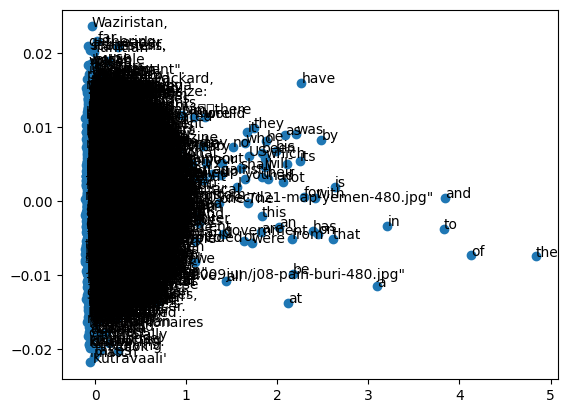

In [8]:
ownWordModel(engSentence,"engmodel.bin")

Word2Vec<vocab=9945, vector_size=100, alpha=0.025>


C:\Users\BALAJI MURUGAN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2962 (\N{TAMIL LETTER O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BALAJI MURUGAN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BALAJI MURUGAN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2992 (\N{TAMIL LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BALAJI MURUGAN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3009 (\N{TAMIL VOWEL SIGN U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\BALAJI MURUGAN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: 

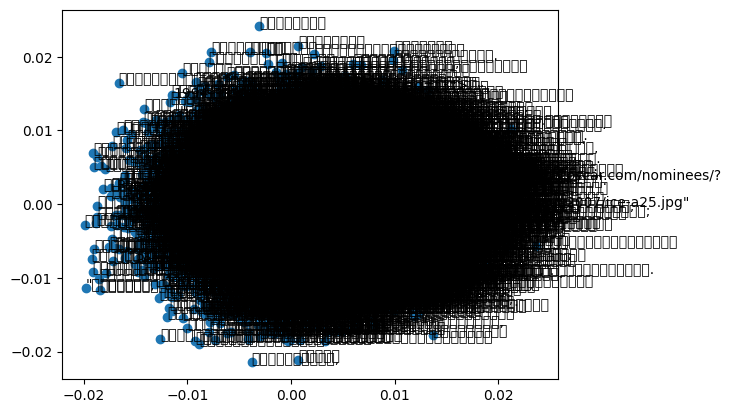

In [9]:
ownWordModel(tamSentence,"tammodel.bin")